
## Group members
- Zainab 20F-0257
- Khansa 20F-1086
- Shahzaib Khan 20F-1079
- Muhammad Abdul Kabir Khan 20F-0350

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h1 align="center" style=" background-color: yellow;">Data Preprocessing:</h1>

## Data Loading

- Loading the data from provided excel file
- Loading all the sheets in the file
- getiing a dictionary as a result

In [ ]:
sheets=['D1','D2','D3','D4','D5','D6','D7']

# reading excel file with all sheets
df_dic = pd.read_excel('Dataset1.xlsx', sheet_name=None)
df_dic['D1'].head()

,Unnamed: 0,As:1,As:2,As:3,As:4,As:5,As:6,As,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz,S-I,S-II,Grade
0,Weight,3.0,3.0,3.0,3.0,3.0,3.0,15.00,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,15.00,15.00,NaN
1,Total,60.0,100.0,140.0,80.0,120.0,80.0,NaN,10.0,10.0,10.0,10.0,10.0,10.0,2.0,NaN,15.00,15.00,NaN
2,Sr.#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,39.5,90.0,120.0,80.0,85.0,75.0,13.20,7.5,4.5,4.5,0.0,1.0,5.0,NaN,4.5,9.75,8.62,Pass
4,2,40.0,62.0,93.0,32.5,75.0,76.0,10.57,1.5,NaN,0.5,0.0,1.0,2.0,NaN,1.0,3.37,3.93,Fail


## Data Preprocessing

### Step 1: Removing Inconsistencies
- Adding a new column `section` in df, to identify sheet name
- removing 1st col and 1st 3 rows
- Also story all dfs in a list, for easier access & looping

In [ ]:
# list to store dfs
df_list = []

# Removing 1st 3 rows and 1st col
# Creating a new df as its safer to store modified data in new df
for sheet_name, df in df_dic.items():
    #   adding sheet name in section col
    df['section'] = sheet_name
    #   append modified df in list
    df_list.append(df_dic[sheet_name].iloc[3:, 1:])
    #   reset index
    df_list[-1].reset_index(drop=True, inplace=True)

df_list[0].head()

,As:1,As:2,As:3,As:4,As:5,As:6,As,Qz:1,Qz:2,Qz:3,Qz:4,Qz:5,Qz:6,Qz:7,Qz,S-I,S-II,Grade,section
0,39.5,90.0,120.0,80.0,85.0,75.0,13.20,7.5,4.5,4.5,0.0,1.0,5.0,NaN,4.5,9.75,8.62,Pass,D1
1,40.0,62.0,93.0,32.5,75.0,76.0,10.57,1.5,NaN,0.5,0.0,1.0,2.0,NaN,1.0,3.37,3.93,Fail,D1
2,42.5,63.0,120.0,62.0,65.0,50.0,10.78,NaN,NaN,1.0,0.0,1.0,0.0,2.0,2.4,6.56,0.93,Fail,D1
3,20.5,42.0,60.0,70.0,70.0,10.0,7.94,1.0,2.0,NaN,0.0,0.0,NaN,2.0,2.6,5.06,2.81,Fail,D1
4,43.0,65.0,125.0,10.0,110.0,25.0,10.46,3.0,1.0,0.0,0.0,0.0,NaN,NaN,0.8,4.50,2.25,Fail,D1


### Step2: Concatinating data Frames
- Sorting all colums in given order

In [ ]:
# empty dataframe to store all the data in 1 df
all_sections = pd.DataFrame()

all_sections = pd.concat(df_list, ignore_index=True)

# Re ordering the column names
custom_order = ['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'As:7', 'As', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'Qz', 'S-I', 'S-II', 'Grade', 'section']
all_sections = all_sections.reindex(custom_order, axis=1)

all_sections

,As:1,As:2,As:3,As:4,As:5,As:6,As:7,As,Qz:1,Qz:2,...,Qz:4,Qz:5,Qz:6,Qz:7,Qz:8,Qz,S-I,S-II,Grade,section
0,39.5,90.0,120.0,80.0,85.0,75.0,NaN,13.20,7.5,4.5,...,0.0,1.0,5.0,NaN,NaN,4.50,9.75,8.62,Pass,D1
1,40.0,62.0,93.0,32.5,75.0,76.0,NaN,10.57,1.5,NaN,...,0.0,1.0,2.0,NaN,NaN,1.00,3.37,3.93,Fail,D1
2,42.5,63.0,120.0,62.0,65.0,50.0,NaN,10.78,NaN,NaN,...,0.0,1.0,0.0,2.0,NaN,2.40,6.56,0.93,Fail,D1
3,20.5,42.0,60.0,70.0,70.0,10.0,NaN,7.94,1.0,2.0,...,0.0,0.0,NaN,2.0,NaN,2.60,5.06,2.81,Fail,D1
4,43.0,65.0,125.0,10.0,110.0,25.0,NaN,10.46,3.0,1.0,...,0.0,0.0,NaN,NaN,NaN,0.80,4.50,2.25,Fail,D1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,101.0,49.5,0.0,47.5,88.0,46.0,NaN,11.03,3.0,8.5,...,0.0,1.0,2.0,2.0,2.0,5.46,6.56,2.90,Fail,D7
273,62.0,0.0,57.0,30.0,87.0,67.0,NaN,9.53,0.0,10.0,...,1.0,3.0,0.0,6.0,2.0,5.13,3.37,1.59,Fail,D7
274,84.0,51.0,44.5,28.0,80.0,48.0,NaN,9.40,2.0,7.0,...,0.0,9.0,3.0,7.0,2.0,7.10,5.25,1.50,Fail,D7
275,125.0,60.0,84.0,40.5,110.0,86.0,NaN,13.87,4.5,6.0,...,0.0,3.0,2.5,2.0,2.0,6.20,8.06,4.31,Pass,D7


### Handling Null values
- Concatinating Dfs has resulted in nul values as some cols were not present in other Dfs

In [ ]:
# Checking NUll Values
all_sections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   As:1     274 non-null    float64
 1   As:2     274 non-null    float64
 2   As:3     270 non-null    float64
 3   As:4     272 non-null    float64
 4   As:5     264 non-null    float64
 5   As:6     251 non-null    float64
 6   As:7     28 non-null     float64
 7   As       275 non-null    float64
 8   Qz:1     266 non-null    float64
 9   Qz:2     264 non-null    float64
 10  Qz:3     259 non-null    float64
 11  Qz:4     251 non-null    float64
 12  Qz:5     252 non-null    float64
 13  Qz:6     202 non-null    float64
 14  Qz:7     175 non-null    float64
 15  Qz:8     99 non-null     float64
 16  Qz       277 non-null    float64
 17  S-I      276 non-null    float64
 18  S-II     276 non-null    float64
 19  Grade    277 non-null    object 
 20  section  277 non-null    object 
dtypes: float64(19), 

### Imputing missing values
- Imputing with 0 is most suitable in this case.
- As and Qz cols should be imputed with the sum of weightage of top 5 assignments.

In [ ]:
# impute 0 in empty indexes of all cols excpet As, Qz and Grade
cols_to_impute = [col for col in all_sections.columns if col not in ['As', 'Qz', 'Grade']]
all_sections[cols_to_impute] = all_sections[cols_to_impute].fillna(0)

print("Total null values in each column")
all_sections.isna().sum()

Total null values in each column


As:1       0
As:2       0
As:3       0
As:4       0
As:5       0
As:6       0
As:7       0
As         2
Qz:1       0
Qz:2       0
Qz:3       0
Qz:4       0
Qz:5       0
Qz:6       0
Qz:7       0
Qz:8       0
Qz         0
S-I        0
S-II       0
Grade      0
section    0
dtype: int64

- As there are only 2 rows with missing values of As col.
- We can simply remove the rows.

In [ ]:
# Removing rows having missing values in As col, As there are only 2 such rows
all_sections.dropna(subset=['As'], inplace=True)

## Feature Engineering

Creating a new colum `Total_score` to store total score before finals.

In [ ]:
all_sections['Total_score'] = all_sections['As'] + all_sections['Qz'] + all_sections['S-I'] + all_sections['S-II']
all_sections

,As:1,As:2,As:3,As:4,As:5,As:6,As:7,As,Qz:1,Qz:2,...,Qz:5,Qz:6,Qz:7,Qz:8,Qz,S-I,S-II,Grade,section,Total_score
0,39.5,90.0,120.0,80.0,85.0,75.0,0.0,13.20,7.5,4.5,...,1.0,5.0,0.0,0.0,4.50,9.75,8.62,Pass,D1,36.07
1,40.0,62.0,93.0,32.5,75.0,76.0,0.0,10.57,1.5,0.0,...,1.0,2.0,0.0,0.0,1.00,3.37,3.93,Fail,D1,18.87
2,42.5,63.0,120.0,62.0,65.0,50.0,0.0,10.78,0.0,0.0,...,1.0,0.0,2.0,0.0,2.40,6.56,0.93,Fail,D1,20.67
3,20.5,42.0,60.0,70.0,70.0,10.0,0.0,7.94,1.0,2.0,...,0.0,0.0,2.0,0.0,2.60,5.06,2.81,Fail,D1,18.41
4,43.0,65.0,125.0,10.0,110.0,25.0,0.0,10.46,3.0,1.0,...,0.0,0.0,0.0,0.0,0.80,4.50,2.25,Fail,D1,18.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,101.0,49.5,0.0,47.5,88.0,46.0,0.0,11.03,3.0,8.5,...,1.0,2.0,2.0,2.0,5.46,6.56,2.90,Fail,D7,25.95
273,62.0,0.0,57.0,30.0,87.0,67.0,0.0,9.53,0.0,10.0,...,3.0,0.0,6.0,2.0,5.13,3.37,1.59,Fail,D7,19.62
274,84.0,51.0,44.5,28.0,80.0,48.0,0.0,9.40,2.0,7.0,...,9.0,3.0,7.0,2.0,7.10,5.25,1.50,Fail,D7,23.25
275,125.0,60.0,84.0,40.5,110.0,86.0,0.0,13.87,4.5,6.0,...,3.0,2.5,2.0,2.0,6.20,8.06,4.31,Pass,D7,32.44


- All necessary Data Preprocessing is complete.
- We can now check the info of data frame.

In [ ]:
all_sections.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 276
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   As:1         275 non-null    float64
 1   As:2         275 non-null    float64
 2   As:3         275 non-null    float64
 3   As:4         275 non-null    float64
 4   As:5         275 non-null    float64
 5   As:6         275 non-null    float64
 6   As:7         275 non-null    float64
 7   As           275 non-null    float64
 8   Qz:1         275 non-null    float64
 9   Qz:2         275 non-null    float64
 10  Qz:3         275 non-null    float64
 11  Qz:4         275 non-null    float64
 12  Qz:5         275 non-null    float64
 13  Qz:6         275 non-null    float64
 14  Qz:7         275 non-null    float64
 15  Qz:8         275 non-null    float64
 16  Qz           275 non-null    float64
 17  S-I          275 non-null    float64
 18  S-II         275 non-null    float64
 19  Grade        

<h1 align="center" style=" background-color: yellow;">Project Phase-I</h1>

## Exploratory Data Analysis (EDA)

### Summary Statistics

#### Analyzing total scores of all sections

In [ ]:
all_sections.groupby("section")["Total_score"].describe()

,count,mean,std,min,25%,50%,75%,max
section,,,,,,,,
D1,69.0,25.737391,7.854907,10.48,19.8300,24.320,30.2500,44.93
D2,39.0,29.881282,7.042814,14.95,24.3150,30.000,34.1000,50.35
D3,41.0,27.636098,7.651127,12.08,21.3100,28.770,32.4400,41.28
D4,32.0,29.412188,5.297410,19.64,25.5175,30.190,32.1450,39.34
D5,28.0,27.933214,9.407067,6.59,21.6075,26.360,32.5250,49.79
D6,32.0,24.787813,6.230161,7.00,21.3375,24.795,29.3925,35.50
D7,34.0,28.012059,7.693433,12.63,23.4425,27.255,33.0100,41.66


## Distribution of Marks across sections

- We can compare distribution of marks in As, Qz, S-I and S-II accross sections
- Histograms and Boxplots are suitable for this.
- By using Box plots we have also identified outliers in each column.

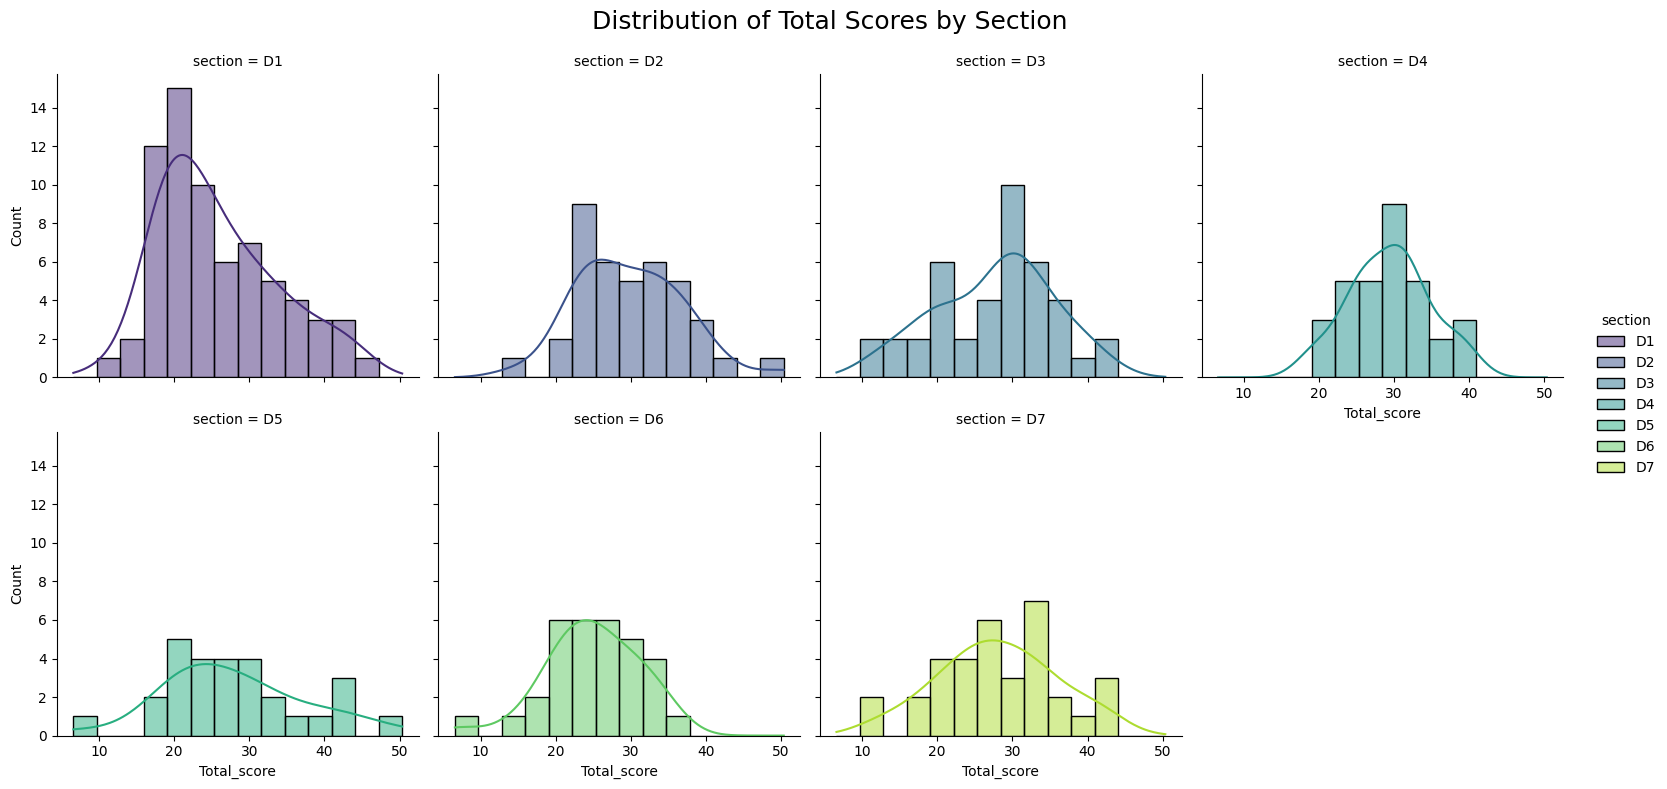

In [ ]:
# histogram for each section
sns.displot(data=all_sections, x="Total_score", col="section", col_wrap=4, kde=True, height=4, hue="section",palette="viridis")

plt.suptitle("Distribution of Total Scores by Section", fontsize=18)
# Adding space between title and histograms
plt.subplots_adjust(top=0.9)

plt.show()

<ipython-input-40-c3d3982039cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_sections, x="section", y="As", palette="viridis")


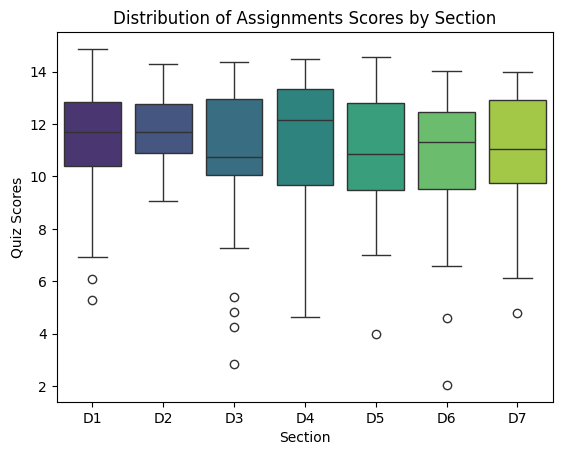

In [ ]:
# Box plot for each section
sns.boxplot(data=all_sections, x="section", y="As", palette="viridis")

plt.title("Distribution of Assignments Scores by Section")
plt.xlabel("Section")
plt.ylabel("Quiz Scores")

plt.show()

<ipython-input-41-1cbfea4cb164>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_sections, x="section", y="Qz", palette="viridis")


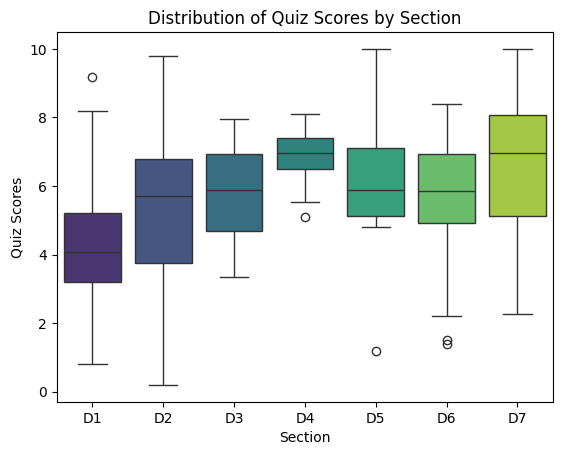

In [ ]:
# Box plot for each section
sns.boxplot(data=all_sections, x="section", y="Qz", palette="viridis")

plt.title("Distribution of Quiz Scores by Section")
plt.xlabel("Section")
plt.ylabel("Quiz Scores")

plt.show()

<ipython-input-42-0a010217f713>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_sections, x="section", y="S-I", palette="viridis")


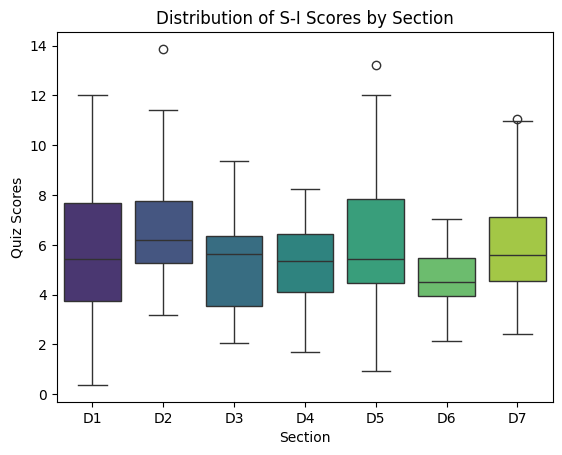

In [ ]:
# Box plot for each section
sns.boxplot(data=all_sections, x="section", y="S-I", palette="viridis")

plt.title("Distribution of S-I Scores by Section")
plt.xlabel("Section")
plt.ylabel("Quiz Scores")

plt.show()

<ipython-input-43-dc6be097ba46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_sections, x="section", y="S-II", palette="viridis")


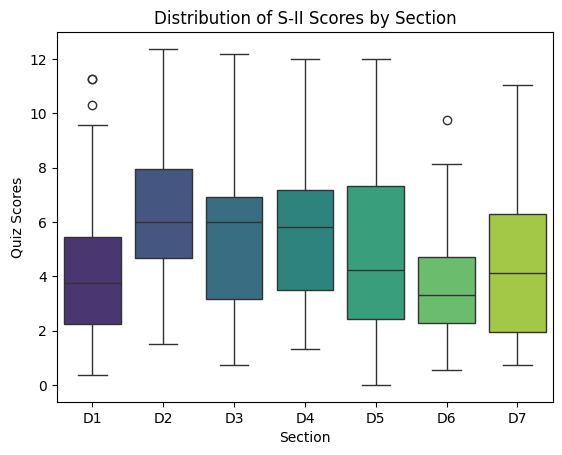

In [ ]:
# Box plot for each section
sns.boxplot(data=all_sections, x="section", y="S-II", palette="viridis")

plt.title("Distribution of S-II Scores by Section")
plt.xlabel("Section")
plt.ylabel("Quiz Scores")

plt.show()

### Correaltion Analysis
- Corr analysis can be performed between 2 numerical columns only
- This corr tells how different scores are related to eachother.

* S-I & S-II have high correlation with Total_score

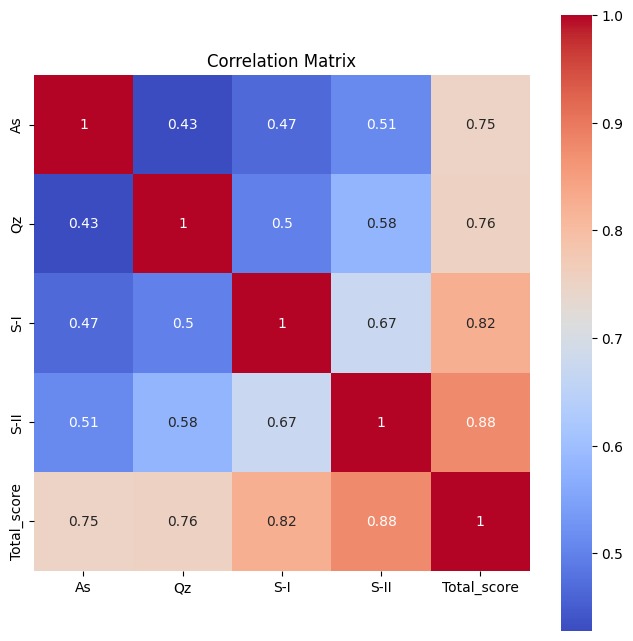

In [ ]:
corr_matrix= all_sections[['As', 'Qz', 'S-I', 'S-II', 'Total_score']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

<h1 align="center" style=" background-color: yellow;">Project Phase-II</h1>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Convert categorical 'Grade' values to numerical values
le = LabelEncoder()
data['Grade'] = le.fit_transform(data['Grade'])

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')
grades = data['Grade']

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Since 'Grade' is now numerical, we can calculate correlations
assignment_corr_with_grade = assignments.corrwith(grades)
quiz_corr_with_grade = quizzes.corrwith(grades)

# Step 4: Combine Scores Based on Criteria
# For example, you can calculate a combined score by taking a weighted sum of average score, variability, and correlation
# You can adjust weights based on importance
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)

# Filter out 'Qz' column from quiz_combined_score calculation
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Print the top assignments and quizzes
print("Top Assignments:", top_assignments)
print("Top Quizzes:", top_quizzes)


Top Assignments: Index(['As:3', 'As:5', 'As:1', 'As:2', 'As:4'], dtype='object')
Top Quizzes: Index(['Qz:2', 'Qz:1', 'Qz:6', 'Qz:3', 'Qz:4'], dtype='object')


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = all_sections

# Convert categorical 'Grade' values to numerical values
le = LabelEncoder()
data['Grade'] = le.fit_transform(data['Grade'])

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')
grades = data['Grade']

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Since 'Grade' is now numerical, we can calculate correlations
assignment_corr_with_grade = assignments.corrwith(grades)
quiz_corr_with_grade = quizzes.corrwith(grades)

# Step 4: Combine Scores Based on Criteria
# For example, you can calculate a combined score by taking a weighted sum of average score, variability, and correlation
# You can adjust weights based on importance
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)

# Filter out 'Qz' column from quiz_combined_score calculation
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Results Reporting
# 1. Confusion Matrix
# Define a custom mapping dictionary for inverse transformation
inverse_class_mapping = {0: 'Fail', 1: 'Pass'}

# Apply inverse transform to convert encoded labels back to original class names
actual_labels_decoded = [inverse_class_mapping[label] for label in y_test]
predicted_labels_decoded = [inverse_class_mapping[label] for label in y_pred]

# Print actual and predicted labels with 'Pass' and 'Fail' values
print("\nActual vs Predicted Labels:")
for actual, predicted in zip(actual_labels_decoded, predicted_labels_decoded):
    print("Actual:", actual, ", Predicted:", predicted)

# Results Reporting
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 2. Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Precision
recall = recall_score(y_test, y_pred)         # Recall
f1 = f1_score(y_test, y_pred)                # F1 Score

# Print performance metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)  # Overall accuracy of the model
print("Precision:", precision)  # Precision
print("Recall:", recall)  # Recall
print("F1 Score:", f1)  # F1 Score



Actual vs Predicted Labels:
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Fail
Actual: Pass , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Pass
Actual: Pass , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Pass
Actual: Pass , Predicted: Fail
Actual: Fail , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Fa

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Convert categorical 'Grade' values to numerical values
le = LabelEncoder()
data['Grade'] = le.fit_transform(data['Grade'])

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')
grades = data['Grade']

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Since 'Grade' is now numerical, we can calculate correlations
assignment_corr_with_grade = assignments.corrwith(grades)
quiz_corr_with_grade = quizzes.corrwith(grades)

# Step 4: Combine Scores Based on Criteria
# For example, you can calculate a combined score by taking a weighted sum of average score, variability, and correlation
# You can adjust weights based on importance
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)

# Filter out 'Qz' column from quiz_combined_score calculation
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Results Reporting
# 1. Confusion Matrix
# Define a custom mapping dictionary for inverse transformation
inverse_class_mapping = {0: 'Fail', 1: 'Pass'}

# Apply inverse transform to convert encoded labels back to original class names
actual_labels_decoded = [inverse_class_mapping[label] for label in y_test]
predicted_labels_decoded = [inverse_class_mapping[label] for label in y_pred]

# Print actual and predicted labels with 'Pass' and 'Fail' values
print("\nActual vs Predicted Labels:")
for actual, predicted in zip(actual_labels_decoded, predicted_labels_decoded):
    print("Actual:", actual, ", Predicted:", predicted)

# Results Reporting
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 2. Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Precision
recall = recall_score(y_test, y_pred)         # Recall
f1 = f1_score(y_test, y_pred)                # F1 Score

# Print performance metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)  # Overall accuracy of the model
print("Precision:", precision)  # Precision
print("Recall:", recall)  # Recall
print("F1 Score:", f1)  # F1 Score



Actual vs Predicted Labels:
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Pass
Actual: Pass , Predicted: Fail
Actual: Pass , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Fail
Actual: Fail , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Pass , Predicted: Pass
Actual: Fail , Predicted: Fail
Actual: Fail , Predicted: Fail
Actual: Fa

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for Mid-II grade prediction
X = data[['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']]  # Features
y = data['Grade']  # Target variable

# One-hot encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocessing Steps
# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Decode labels to 'Pass' or 'Fail'
actual_labels_decoded = le.inverse_transform(y_test)
predicted_labels_decoded = le.inverse_transform(y_pred)

# Map label encodings to 'Pass' or 'Fail'
label_map = {0: 'Fail', 1: 'Pass'}
actual_labels_pass_fail = [label_map[label] for label in actual_labels_decoded]
predicted_labels_pass_fail = [label_map[label] for label in predicted_labels_decoded]

# Results Reporting
# 1. Actual vs Predicted Labels
print("\nActual vs Predicted Labels:")
for actual, predicted in zip(actual_labels_pass_fail, predicted_labels_pass_fail):
    print("Actual Grade:", actual, ", Predicted Grade:", predicted)

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual Fail', 'Actual Pass'], columns=['Predicted Fail', 'Predicted Pass']))

# 3. Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Precision
recall = recall_score(y_test, y_pred)         # Recall
f1 = f1_score(y_test, y_pred)                # F1 Score

# Print performance metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)  # Overall accuracy of the model
print("Precision:", precision)  # Precision
print("Recall:", recall)  # Recall
print("F1 Score:", f1)  # F1 Score



Actual vs Predicted Labels:
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Pred

**Added Results of Decision Tree and Nearest Neigbhour Before Sessional 2**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections.copy()  # Make a copy to avoid modifying the original data

# Selecting relevant columns for Mid-II grade prediction
X = data[['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']]  # Features
y = data['Grade']  # Target variable

# One-hot encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocessing Steps
# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier and KNeighborsClassifier
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()

# Fit both models on the training data
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions using both models on the testing data
dt_y_pred = dt_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# Map labels to 'Pass' or 'Fail' for both models
dt_predicted_labels_mapped = ['Pass' if label == 1 else 'Fail' for label in dt_y_pred]
knn_predicted_labels_mapped = ['Pass' if label == 1 else 'Fail' for label in knn_y_pred]

# Add new columns for predicted values by both models to the DataFrame
data['Predicted Grade (Decision Tree)'] = pd.Series(dt_predicted_labels_mapped)
data['Predicted Grade (k-NN)'] = pd.Series(knn_predicted_labels_mapped)

# Print the updated DataFrame
print(data.head(30))


    As:1   As:2   As:3  As:4   As:5  As:6  As:7     As  Qz:1  Qz:2  ...  Qz:7  \
0   39.5   90.0  120.0  80.0   85.0  75.0   0.0  13.20   7.5   4.5  ...   0.0   
1   40.0   62.0   93.0  32.5   75.0  76.0   0.0  10.57   1.5   0.0  ...   0.0   
2   42.5   63.0  120.0  62.0   65.0  50.0   0.0  10.78   0.0   0.0  ...   2.0   
3   20.5   42.0   60.0  70.0   70.0  10.0   0.0   7.94   1.0   2.0  ...   2.0   
4   43.0   65.0  125.0  10.0  110.0  25.0   0.0  10.46   3.0   1.0  ...   0.0   
5   42.0   90.0  125.0  70.0   95.0  50.0   0.0  12.47   4.0   3.5  ...   2.0   
6   22.0   76.0  110.0  65.0   70.0  30.0   0.0   9.94   2.5   2.0  ...   0.0   
7   48.0   80.0  130.0  75.0   97.0  80.0   0.0  13.42   6.0   4.0  ...   2.0   
8   50.5  100.0  135.0  70.0  118.0  80.0   0.0  14.46   5.5   2.0  ...   2.0   
9   45.5   98.0  137.0  70.0  100.0  40.0   0.0  13.27   5.5   3.0  ...   2.0   
10  13.5   59.0   65.0  35.0    0.0  25.0   0.0   6.08   1.0   1.0  ...   2.0   
11  42.0   97.0  130.0  67.0

**Accuracy on first four Assignmnets and Accuracy on test and train dataset using Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for Mid-II grade prediction
X = data[['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']]  # Features
y = data['Grade']  # Target variable

# One-hot encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocessing Steps
# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate accuracy on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy on testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on testing data:", accuracy_test)


Accuracy on training data: 1.0
Accuracy on testing data: 0.8909090909090909


**Accuracy on first four Assignmnets and Accuracy on test and train dataset using Nearest Neigbhour**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for Mid-II grade prediction
X = data[['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']]  # Features
y = data['Grade']  # Target variable

# One-hot encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocessing Steps
# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier with k=5 (you can adjust k as needed)
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate accuracy on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Decode labels to 'Pass' or 'Fail'
actual_labels_decoded = le.inverse_transform(y_test)
predicted_labels_decoded = le.inverse_transform(y_pred)

# Map label encodings to 'Pass' or 'Fail'
label_map = {0: 'Fail', 1: 'Pass'}
actual_labels_pass_fail = [label_map[label] for label in actual_labels_decoded]
predicted_labels_pass_fail = [label_map[label] for label in predicted_labels_decoded]

# Results Reporting
# 1. Actual vs Predicted Labels
print("\nActual vs Predicted Labels:")
for actual, predicted in zip(actual_labels_pass_fail, predicted_labels_pass_fail):
    print("Actual Grade:", actual, ", Predicted Grade:", predicted)

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual Fail', 'Actual Pass'], columns=['Predicted Fail', 'Predicted Pass']))

# 3. Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Precision
recall = recall_score(y_test, y_pred)         # Recall
f1 = f1_score(y_test, y_pred)                # F1 Score

# Print performance metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)  # Overall accuracy of the model
print("Precision:", precision)  # Precision
print("Recall:", recall)  # Recall
print("F1 Score:", f1)  # F1 Score


Accuracy on training data: 0.8363636363636363

Actual vs Predicted Labels:
Actual Grade: Fail , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Pass
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Fail , Predicted Grade: Fail
Actual Grade: Pass , P

**Finding Accuracy on Test and Train Data using KNN for Final Grade Using best Assignments and Quizzes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Grade'])

# Replace 'Grade' column with encoded labels
data['Grade'] = y_encoded

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Exclude 'Grade' column from correlation calculation
assignment_corr_with_grade = assignments.corrwith(pd.Series(y_encoded))
quiz_corr_with_grade = quizzes.corrwith(pd.Series(y_encoded))

# Step 4: Combine Scores Based on Criteria
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate accuracy on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy on testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on testing data:", accuracy_test)

# Convert predicted labels back to original grades
predicted_train_grades = label_encoder.inverse_transform(y_train_pred)
predicted_test_grades = label_encoder.inverse_transform(y_test_pred)

# Convert grades to 'Pass' or 'Fail'
passing_grade_threshold = 0.5  # You may adjust this threshold based on your needs

def pass_fail(grade):
    return 'Pass' if grade >= passing_grade_threshold else 'Fail'

# Apply pass/fail function to actual and predicted grades
train_results = pd.DataFrame({'Actual Grade': y.apply(pass_fail), 'Predicted Grade': pd.Series(predicted_train_grades).apply(pass_fail)})
test_results = pd.DataFrame({'Actual Grade': y.apply(pass_fail), 'Predicted Grade': pd.Series(predicted_test_grades).apply(pass_fail)})

print("\nTraining Set Results:")
print(train_results)

print("\nTest Set Results:")
print(test_results)

# Get the number of samples in the training set
num_train_samples = X_train.shape[0]

# Get the number of samples in the testing set
num_test_samples = X_test.shape[0]

# Calculate the ratio of training to testing data
ratio_train_test = num_train_samples / num_test_samples

print("Number of samples in training set:", num_train_samples)
print("Number of samples in testing set:", num_test_samples)
print("Ratio of training to testing data:", ratio_train_test)



Accuracy on training data: 0.8363636363636363
Accuracy on testing data: 0.7454545454545455

Training Set Results:
    Actual Grade Predicted Grade
0           Pass            Fail
1           Fail            Pass
2           Fail            Pass
3           Fail            Fail
4           Fail            Fail
..           ...             ...
272         Fail             NaN
273         Fail             NaN
274         Fail             NaN
275         Pass             NaN
276         Fail             NaN

[276 rows x 2 columns]

Test Set Results:
    Actual Grade Predicted Grade
0           Pass            Fail
1           Fail            Pass
2           Fail            Pass
3           Fail            Pass
4           Fail            Fail
..           ...             ...
272         Fail             NaN
273         Fail             NaN
274         Fail             NaN
275         Pass             NaN
276         Fail             NaN

[275 rows x 2 columns]
Number of samples in traini

**Finding Accuracy on Train and test Data on Decision Tree**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Grade'])

# Replace 'Grade' column with encoded labels
data['Grade'] = y_encoded

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Exclude 'Grade' column from correlation calculation
assignment_corr_with_grade = assignments.corrwith(pd.Series(y_encoded))
quiz_corr_with_grade = quizzes.corrwith(pd.Series(y_encoded))

# Step 4: Combine Scores Based on Criteria
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate accuracy on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy on testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on testing data:", accuracy_test)

# Convert predicted labels back to original grades
predicted_train_grades = label_encoder.inverse_transform(y_train_pred)
predicted_test_grades = label_encoder.inverse_transform(y_test_pred)

# Convert grades to 'Pass' or 'Fail'
passing_grade_threshold = 0.5  # You may adjust this threshold based on your needs

def pass_fail(grade):
    return 'Pass' if grade >= passing_grade_threshold else 'Fail'

# Apply pass/fail function to actual and predicted grades
train_results = pd.DataFrame({'Actual Grade': y.apply(pass_fail), 'Predicted Grade': pd.Series(predicted_train_grades).apply(pass_fail)})
test_results = pd.DataFrame({'Actual Grade': y.apply(pass_fail), 'Predicted Grade': pd.Series(predicted_test_grades).apply(pass_fail)})

print("\nTraining Set Results:")
print(train_results)

print("\nTest Set Results:")
print(test_results)

# Get the number of samples in the training set
num_train_samples = X_train.shape[0]

# Get the number of samples in the testing set
num_test_samples = X_test.shape[0]

# Calculate the ratio of training to testing data
ratio_train_test = num_train_samples / num_test_samples

print("Number of samples in training set:", num_train_samples)
print("Number of samples in testing set:", num_test_samples)
print("Ratio of training to testing data:", ratio_train_test)


Accuracy on training data: 1.0
Accuracy on testing data: 0.7272727272727273

Training Set Results:
    Actual Grade Predicted Grade
0           Pass            Fail
1           Fail            Pass
2           Fail            Pass
3           Fail            Fail
4           Fail            Fail
..           ...             ...
272         Fail             NaN
273         Fail             NaN
274         Fail             NaN
275         Pass             NaN
276         Fail             NaN

[276 rows x 2 columns]

Test Set Results:
    Actual Grade Predicted Grade
0           Pass            Fail
1           Fail            Fail
2           Fail            Fail
3           Fail            Pass
4           Fail            Pass
..           ...             ...
272         Fail             NaN
273         Fail             NaN
274         Fail             NaN
275         Pass             NaN
276         Fail             NaN

[275 rows x 2 columns]
Number of samples in training set: 220
Num

**K Nearest Neigbhour and Added Predicted Values**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Grade'])

# Replace 'Grade' column with encoded labels
data['Grade'] = y_encoded

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Exclude 'Grade' column from correlation calculation
assignment_corr_with_grade = assignments.corrwith(pd.Series(y_encoded))
quiz_corr_with_grade = quizzes.corrwith(pd.Series(y_encoded))

# Step 4: Combine Scores Based on Criteria
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Initialize the KNeighborsClassifier
model = KNeighborsClassifier()

# Fit the model on all data
model.fit(X, y)

# Make predictions on all data
all_data_pred = model.predict(X)

# Convert predicted labels back to original grades
predicted_grades = label_encoder.inverse_transform(all_data_pred)

# Create two extra rows with default value 'Extra' for predicted grades
extra_rows = pd.Series(['Extra'] * 2)

# Concatenate the extra rows with the predicted grades
predicted_grades = pd.concat([pd.Series(predicted_grades), extra_rows], ignore_index=True)

# Add the predicted grades as a new column in the original dataset
data_with_predictions = data.copy()
data_with_predictions['Predicted Grade with KNN'] = predicted_grades

# Map numerical grades to 'Pass' or 'Fail'
data_with_predictions['Grade'] = data_with_predictions['Grade'].replace({0: 'Fail', 1: 'Pass'})
data_with_predictions['Predicted Grade with KNN'] = data_with_predictions['Predicted Grade with KNN'].replace({0: 'Fail', 1: 'Pass'})
data_with_predictions.drop(columns=['Predicted Grade with KNN'], inplace=True)


print("\nOriginal Dataset with Predicted Grades (as Pass/Fail):")
print(data_with_predictions)



Original Dataset with Predicted Grades (as Pass/Fail):
      As:1  As:2   As:3  As:4   As:5  As:6  As:7     As  Qz:1  Qz:2  ...  \
0     39.5  90.0  120.0  80.0   85.0  75.0   0.0  13.20   7.5   4.5  ...   
1     40.0  62.0   93.0  32.5   75.0  76.0   0.0  10.57   1.5   0.0  ...   
2     42.5  63.0  120.0  62.0   65.0  50.0   0.0  10.78   0.0   0.0  ...   
3     20.5  42.0   60.0  70.0   70.0  10.0   0.0   7.94   1.0   2.0  ...   
4     43.0  65.0  125.0  10.0  110.0  25.0   0.0  10.46   3.0   1.0  ...   
..     ...   ...    ...   ...    ...   ...   ...    ...   ...   ...  ...   
272  101.0  49.5    0.0  47.5   88.0  46.0   0.0  11.03   3.0   8.5  ...   
273   62.0   0.0   57.0  30.0   87.0  67.0   0.0   9.53   0.0  10.0  ...   
274   84.0  51.0   44.5  28.0   80.0  48.0   0.0   9.40   2.0   7.0  ...   
275  125.0  60.0   84.0  40.5  110.0  86.0   0.0  13.87   4.5   6.0  ...   
276   97.0   0.0   50.0  41.0   72.0   0.0   0.0   8.16   0.0   4.5  ...   

     Qz:5  Qz:6  Qz:7  Qz:8    

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Grade'])

# Replace 'Grade' column with encoded labels
data['Grade'] = y_encoded

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Exclude 'Grade' column from correlation calculation
assignment_corr_with_grade = assignments.corrwith(pd.Series(y_encoded))
quiz_corr_with_grade = quizzes.corrwith(pd.Series(y_encoded))

# Step 4: Combine Scores Based on Criteria
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Fit the KNN model on all data
knn_model.fit(X, y)

# Make predictions using KNN
knn_pred = knn_model.predict(X)

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the Decision Tree model on all data
dt_model.fit(X, y)

# Make predictions using Decision Tree
dt_pred = dt_model.predict(X)

# Convert predicted labels back to original grades
predicted_grades_knn = label_encoder.inverse_transform(knn_pred)
predicted_grades_dt = label_encoder.inverse_transform(dt_pred)

# Add the predicted grades as new columns in the original dataset
data_with_predictions = data.copy()
data_with_predictions['Predicted Grade (KNN) for final Grade'] = predicted_grades_knn
data_with_predictions['Predicted Grade (Decision Tree) for final Grade'] = predicted_grades_dt

# Map numerical grades to 'Pass' or 'Fail' for both KNN and Decision Tree predictions
data_with_predictions['Predicted Grade (KNN) for final Grade'] = data_with_predictions['Predicted Grade (KNN) for final Grade'].replace({0: 'Fail', 1: 'Pass'})
data_with_predictions['Predicted Grade (Decision Tree) for final Grade'] = data_with_predictions['Predicted Grade (Decision Tree) for final Grade'].replace({0: 'Fail', 1: 'Pass'})

print("\nOriginal Dataset with Predicted Grades:")
print(data_with_predictions)



Original Dataset with Predicted Grades:
      As:1  As:2   As:3  As:4   As:5  As:6  As:7     As  Qz:1  Qz:2  ...  \
0     39.5  90.0  120.0  80.0   85.0  75.0   0.0  13.20   7.5   4.5  ...   
1     40.0  62.0   93.0  32.5   75.0  76.0   0.0  10.57   1.5   0.0  ...   
2     42.5  63.0  120.0  62.0   65.0  50.0   0.0  10.78   0.0   0.0  ...   
3     20.5  42.0   60.0  70.0   70.0  10.0   0.0   7.94   1.0   2.0  ...   
4     43.0  65.0  125.0  10.0  110.0  25.0   0.0  10.46   3.0   1.0  ...   
..     ...   ...    ...   ...    ...   ...   ...    ...   ...   ...  ...   
272  101.0  49.5    0.0  47.5   88.0  46.0   0.0  11.03   3.0   8.5  ...   
273   62.0   0.0   57.0  30.0   87.0  67.0   0.0   9.53   0.0  10.0  ...   
274   84.0  51.0   44.5  28.0   80.0  48.0   0.0   9.40   2.0   7.0  ...   
275  125.0  60.0   84.0  40.5  110.0  86.0   0.0  13.87   4.5   6.0  ...   
276   97.0   0.0   50.0  41.0   72.0   0.0   0.0   8.16   0.0   4.5  ...   

     Qz:7  Qz:8    Qz   S-I  S-II  Grade  sect

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = all_sections.copy()  # Make a copy to avoid modifying the original data

# Selecting relevant columns for calculating best assignments and quizzes
assignments = data.filter(like='As')
quizzes = data.filter(like='Qz')

# Convert grades to binary labels (Pass/Fail)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Grade'])

# Replace 'Grade' column with encoded labels
data['Grade'] = y_encoded

# Step 1: Calculate the Average Score
assignment_avg_score = assignments.mean(axis=0)
quiz_avg_score = quizzes.mean(axis=0)

# Step 2: Calculate the Variability in Scores
assignment_std_dev = assignments.std(axis=0)
quiz_std_dev = quizzes.std(axis=0)

# Step 3: Calculate the Correlation with Final Grade
# Exclude 'Grade' column from correlation calculation
assignment_corr_with_grade = assignments.corrwith(pd.Series(y_encoded))
quiz_corr_with_grade = quizzes.corrwith(pd.Series(y_encoded))

# Step 4: Combine Scores Based on Criteria
assignment_combined_score = (assignment_avg_score * 0.5) + (1 / assignment_std_dev) + (assignment_corr_with_grade * 0.3)
quiz_combined_score = (quiz_avg_score.drop('Qz') * 0.5) + (1 / quiz_std_dev.drop('Qz')) + (quiz_corr_with_grade.drop('Qz') * 0.3)

# Step 5: Select Top Assignments and Quizzes
top_assignments = assignment_combined_score.nlargest(5).index
top_quizzes = quiz_combined_score.nlargest(5).index

# Prepare the feature set with top assignments and quizzes
X = data[top_assignments.union(top_quizzes)]
y = data['Grade']

# Initialize the KNeighborsClassifier and DecisionTreeClassifier
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Fit both models on all data
knn_model.fit(X, y)
dt_model.fit(X, y)

# Make predictions using both models
knn_pred = knn_model.predict(X)
dt_pred = dt_model.predict(X)

# Map predicted labels back to original grades
predicted_grades_knn = label_encoder.inverse_transform(knn_pred)
predicted_grades_dt = label_encoder.inverse_transform(dt_pred)

# Add the predicted grades as new columns in the original dataset
data_with_predictions = data.copy()
data_with_predictions['Predicted Grade (KNN) for final Grade'] = predicted_grades_knn
data_with_predictions['Predicted Grade (Decision Tree) for final Grade'] = predicted_grades_dt

# Map numerical grades to 'Pass' or 'Fail' for both KNN and Decision Tree predictions
data_with_predictions['Predicted Grade (KNN) for final Grade'] = data_with_predictions['Predicted Grade (KNN) for final Grade'].replace({0: 'Fail', 1: 'Pass'})
data_with_predictions['Predicted Grade (Decision Tree) for final Grade'] = data_with_predictions['Predicted Grade (Decision Tree) for final Grade'].replace({0: 'Fail', 1: 'Pass'})

# Load your dataset
data = all_sections.copy()  # Make a copy to avoid modifying the original data

# Selecting relevant columns for Mid-II grade prediction
X = data[['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'S-I']]  # Features
y = data['Grade']  # Target variable

# One-hot encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the DecisionTreeClassifier and KNeighborsClassifier
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()

# Fit both models on the training data
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions using both models on the testing data
dt_y_pred = dt_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# Map labels to 'Pass' or 'Fail' for both models
dt_predicted_labels_mapped = ['Pass' if label == 1 else 'Fail' for label in dt_y_pred]
knn_predicted_labels_mapped = ['Pass' if label == 1 else 'Fail' for label in knn_y_pred]

# Add new columns for predicted values by both models to the DataFrame
data['Predicted Grade (Decision Tree)'] = pd.Series(dt_predicted_labels_mapped)
data['Predicted Grade (k-NN)'] = pd.Series(knn_predicted_labels_mapped)

# Combine the datasets based on index
data_with_predictions['Predicted Grade (KNN) for Mid-II Grade'] = data['Predicted Grade (k-NN)']
data_with_predictions['Predicted Grade (Decision Tree) for Mid-II Grade'] = data['Predicted Grade (Decision Tree)']

print("\nOriginal Dataset with Predicted Grades:")
print(data_with_predictions.head(10))



Original Dataset with Predicted Grades:
   As:1   As:2   As:3  As:4   As:5  As:6  As:7     As  Qz:1  Qz:2  ...    Qz  \
0  39.5   90.0  120.0  80.0   85.0  75.0   0.0  13.20   7.5   4.5  ...  4.50   
1  40.0   62.0   93.0  32.5   75.0  76.0   0.0  10.57   1.5   0.0  ...  1.00   
2  42.5   63.0  120.0  62.0   65.0  50.0   0.0  10.78   0.0   0.0  ...  2.40   
3  20.5   42.0   60.0  70.0   70.0  10.0   0.0   7.94   1.0   2.0  ...  2.60   
4  43.0   65.0  125.0  10.0  110.0  25.0   0.0  10.46   3.0   1.0  ...  0.80   
5  42.0   90.0  125.0  70.0   95.0  50.0   0.0  12.47   4.0   3.5  ...  5.90   
6  22.0   76.0  110.0  65.0   70.0  30.0   0.0   9.94   2.5   2.0  ...  2.29   
7  48.0   80.0  130.0  75.0   97.0  80.0   0.0  13.42   6.0   4.0  ...  4.59   
8  50.5  100.0  135.0  70.0  118.0  80.0   0.0  14.46   5.5   2.0  ...  7.60   
9  45.5   98.0  137.0  70.0  100.0  40.0   0.0  13.27   5.5   3.0  ...  6.10   

     S-I   S-II  Grade  section  Total_score  \
0   9.75   8.62      1       D